In [1]:
from interpret.glassbox import (
    ExplainableBoostingClassifier,
    ExplainableBoostingRegressor
    )
from typing import Union
import numpy as np
import openml
import joblib
import pandas as pd
import gamchanger as gc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from caafe import CAAFEClassifier
import openai
import caafe
import pickle
from caafe import data
from caafe import preprocessing
from interpret import show
from tabpfn.scripts import tabular_metrics
import os
#from utils import insert_graph


seed = 0

import t2ebm
import t2ebm.graphs as graphs
from t2ebm.graphs import EBMGraph

with open("ebm_spaceship.pkl", "rb") as file:
    og_ebm = pickle.load(file)

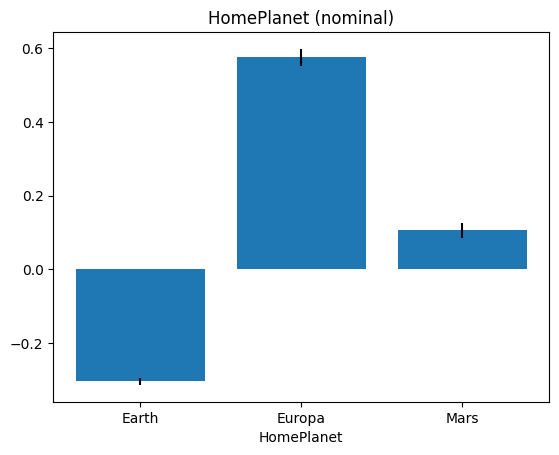

In [2]:
graph_home = graphs.extract_graph(og_ebm, 0)
graphs.plot_graph(graph_home)

In [3]:
og_ebm.feature_types_in_

['nominal',
 'nominal',
 'nominal',
 'nominal',
 'continuous',
 'nominal',
 'continuous',
 'continuous',
 'continuous',
 'continuous',
 'continuous',
 'nominal']

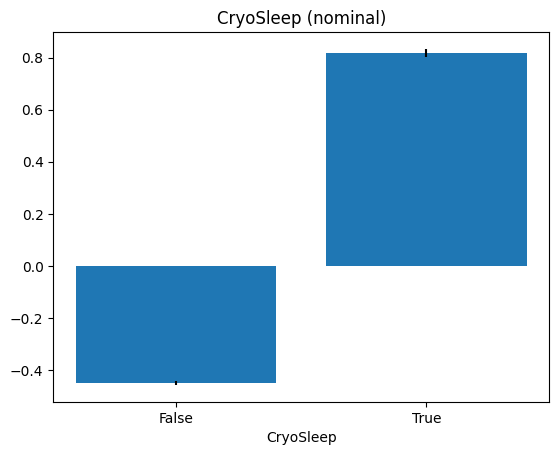

In [4]:
graph_cryo = graphs.extract_graph(og_ebm, 1)
graphs.plot_graph(graph_cryo)

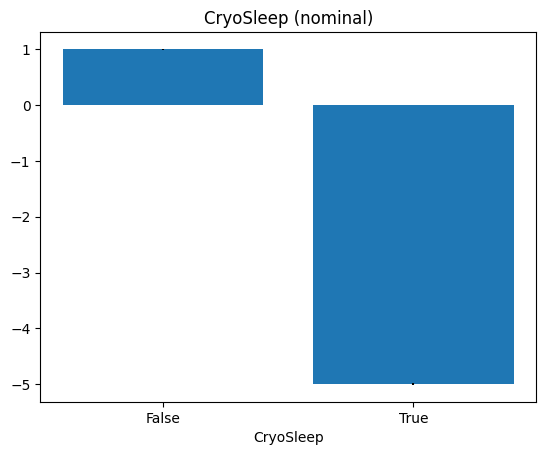

In [5]:
edit_graph = graph_cryo
edit_graph.scores = [1, -5]
graphs.plot_graph(edit_graph)

Categorical Feature

In [6]:
def insert_graph_cat(
        graph: EBMGraph,
        ebm: Union[ExplainableBoostingRegressor, ExplainableBoostingClassifier]
):
    feature_index = ebm.feature_names_in_.index(graph.feature_name)

    print(ebm.term_scores_[feature_index])
    print(graph.scores)

    ebm.term_scores_[feature_index][1:-1] = graph.scores

    print(type(ebm.term_scores_[feature_index]))

    return ebm

In [9]:
new_ebm = insert_graph(edit_graph, og_ebm)

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


Continuous Feature

In [7]:
def insert_graph_cont(
        graph: EBMGraph,
        ebm: Union[ExplainableBoostingRegressor, ExplainableBoostingClassifier]
):
    feature_index = ebm.feature_names_in_.index(graph.feature_name)

    print(ebm.term_scores_[feature_index])
    print(graph.scores)

    ebm.term_scores_[feature_index][1:-1] = graph.scores

    print(ebm.term_scores_[feature_index])

    return ebm

In [15]:
og_ebm.term_scores_[4]

array([-0.0187072 ,  0.58654981,  0.39117549,  0.37894815,  0.36479875,
        0.34534948,  0.17922681,  0.15850487,  0.14081871,  0.1248823 ,
        0.1117305 ,  0.10328608,  0.09180665,  0.08142255,  0.06860542,
        0.05880047,  0.05049835,  0.039126  ,  0.02960283,  0.01938467,
        0.01169476,  0.00334159, -0.01210573, -0.01520471, -0.01855074,
       -0.0338599 , -0.11772491, -0.06667234, -0.05917145, -0.05992347,
       -0.06339097, -0.07581479, -0.07870423, -0.08021695, -0.07371845,
       -0.07301836, -0.07251278, -0.07198262, -0.07284007, -0.0698507 ,
       -0.06596658, -0.02754467, -0.02549805, -0.02339416, -0.02114628,
       -0.01878305, -0.02117725, -0.02227491, -0.02338673, -0.02548055,
       -0.03140881, -0.03241089, -0.03512523, -0.03319405, -0.03352362,
       -0.03270047, -0.03077649, -0.03051495, -0.02620975, -0.02183452,
       -0.01749657, -0.02332183, -0.02391846, -0.02567412, -0.02993712,
       -0.03718932, -0.07341471, -0.02693815, -0.02253123, -0.02

In [8]:
graph_age_old = graphs.extract_graph(og_ebm, 4)
graph_age_old.scores

array([ 0.58654981,  0.39117549,  0.37894815,  0.36479875,  0.34534948,
        0.17922681,  0.15850487,  0.14081871,  0.1248823 ,  0.1117305 ,
        0.10328608,  0.09180665,  0.08142255,  0.06860542,  0.05880047,
        0.05049835,  0.039126  ,  0.02960283,  0.01938467,  0.01169476,
        0.00334159, -0.01210573, -0.01520471, -0.01855074, -0.0338599 ,
       -0.11772491, -0.06667234, -0.05917145, -0.05992347, -0.06339097,
       -0.07581479, -0.07870423, -0.08021695, -0.07371845, -0.07301836,
       -0.07251278, -0.07198262, -0.07284007, -0.0698507 , -0.06596658,
       -0.02754467, -0.02549805, -0.02339416, -0.02114628, -0.01878305,
       -0.02117725, -0.02227491, -0.02338673, -0.02548055, -0.03140881,
       -0.03241089, -0.03512523, -0.03319405, -0.03352362, -0.03270047,
       -0.03077649, -0.03051495, -0.02620975, -0.02183452, -0.01749657,
       -0.02332183, -0.02391846, -0.02567412, -0.02993712, -0.03718932,
       -0.07341471, -0.02693815, -0.02253123, -0.02135793, -0.03

In [9]:
print(len(graph_age_old.scores))
print(len(og_ebm.term_scores_[4]))

79
81


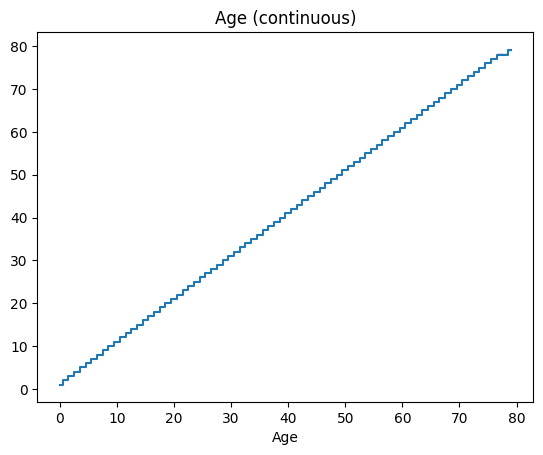

In [26]:
graph_age_new = graph_age_old
arr = np.arange(1, 80)
graph_age_new.scores = arr
graphs.plot_graph(graph_age_new)

In [39]:
new_ebm_const = insert_graph_cont(graph_age_new, og_ebm)

[-1.87071977e-02  1.00000000e+00  2.00000000e+00  3.00000000e+00
  4.00000000e+00  5.00000000e+00  6.00000000e+00  7.00000000e+00
  8.00000000e+00  9.00000000e+00  1.00000000e+01  1.10000000e+01
  1.20000000e+01  1.30000000e+01  1.40000000e+01  1.50000000e+01
  1.60000000e+01  1.70000000e+01  1.80000000e+01  1.90000000e+01
  2.00000000e+01  2.10000000e+01  2.20000000e+01  2.30000000e+01
  2.40000000e+01  2.50000000e+01  2.60000000e+01  2.70000000e+01
  2.80000000e+01  2.90000000e+01  3.00000000e+01  3.10000000e+01
  3.20000000e+01  3.30000000e+01  3.40000000e+01  3.50000000e+01
  3.60000000e+01  3.70000000e+01  3.80000000e+01  3.90000000e+01
  4.00000000e+01  4.10000000e+01  4.20000000e+01  4.30000000e+01
  4.40000000e+01  4.50000000e+01  4.60000000e+01  4.70000000e+01
  4.80000000e+01  4.90000000e+01  5.00000000e+01  5.10000000e+01
  5.20000000e+01  5.30000000e+01  5.40000000e+01  5.50000000e+01
  5.60000000e+01  5.70000000e+01  5.80000000e+01  5.90000000e+01
  6.00000000e+01  6.10000

In [40]:
show(new_ebm_const.explain_global())

<!-- http://127.0.0.1:7001/140199384837616/ -->